 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 5. Machine Learning Basis**
# Section 5. Multivariate Linear Regression

### _Objective_
1. 독립 변수가 2개 이상인 Multivariate Linear Regression에 대해 배워봅니다. <br>
2. Min-Max Scaling에 대해 배워봅니다. <br>
  
╚═════════════════════════════════════════╝

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

## 예제 데이터 ) Boston 집값 데이터셋

In [0]:
# boston dataset 가져오기
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
boston_df = pd.DataFrame(boston['data'],
                         columns=boston['feature_names'])
boston_df['house_price'] = boston['target']
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


<br><br>

# \[ 1. Feature Scaling \]

----

----

> *Feature Scaling은 Raw-Data을 전처리하는 과정 중 하나입니다.*<br>
> *Feature Scaling을 적용하면, 보다 안정적이고 빠르게 모델을 수렴시킬 수 있습니다.*

## 1. Raw Dataset 살펴보기

----

보스턴 데이터셋에는 13개의 독립 변수와 1개의 종속 변수로 이루어져 있습니다. 

In [0]:
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [0]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


변수 별로, 값의 범위가 매우 상이합니다.<br>
값이 큰 변수가 결과값에 더 큰 영향을 미칠 수 있습니다.<br>
이를 방지하기 위해 변수 간의 범위를 동일하게 만들어 줄 필요가 있습니다.

## 2. Min-Max Normalization
---

데이터를 모두 0~1 사이의 값으로 변환시켜 줍니다.<br>
각 Feature(독립 변수) 별로 최소값을 뺀후 최대값과 최소값의 차이로 나누어 줍니다.<br>
이를 통해 간단히 모든 Feature의 크기를 0과 1사이로 잡아줄 수 있습니다.
$$
Z = \frac{X - Min(X)}{Max(X) - Min(X)}
$$

### (1) Min-Max 적용하기

In [0]:
max_value = boston_df.max()
min_value = boston_df.min()
min_value # 각 Feature 별 최솟값

CRIM             0.00632
ZN               0.00000
INDUS            0.46000
CHAS             0.00000
NOX              0.38500
RM               3.56100
AGE              2.90000
DIS              1.12960
RAD              1.00000
TAX            187.00000
PTRATIO         12.60000
B                0.32000
LSTAT            1.73000
house_price      5.00000
dtype: float64

In [0]:
minmax_df = (boston_df - min_value)/(max_value-min_value)
minmax_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,0.389618
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,0.267222
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,0.360000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### (2) min-max 복원하기

모델에 적용한 후, 그 결과값을 확인하기 위해, 정규화한 값을 복원해야 할 경우가 <br>
발생합니다. 이때는 역으로 곱해주면 됩니다.

$$
X = (Max(X) - Min(X))Z + Min(X)
$$

In [0]:
restored_df = (minmax_df*(max_value-min_value) + min_value)
restored_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 3. Standardization
---

데이터를 표준 점수 값으로 변환시켜 줍니다. <br>
각 Feature(독립 변수) 별로 평균값을 뺀후 표준편차로 나누어 줍니다.<br>
각 Feature들의 평균과 표준편차를 동일하게 만들어 줌으로써, 상관관계를 파악하는 데 유리해집니다.

$$
Z = \frac{X - mean(X)}{std(X)}
$$

### (1) Standardization 적용하기

In [0]:
mean_value = boston_df.mean()
std_value = boston_df.std()
std_value

CRIM             8.601545
ZN              23.322453
INDUS            6.860353
CHAS             0.253994
NOX              0.115878
RM               0.702617
AGE             28.148861
DIS              2.105710
RAD              8.707259
TAX            168.537116
PTRATIO          2.164946
B               91.294864
LSTAT            7.141062
house_price      9.197104
dtype: float64

In [0]:
z_df = (boston_df - mean_value)/std_value
z_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,8.326673e-17,3.466704e-16,-3.016965e-15,3.999875e-16,3.563575e-15,-1.149882e-14,-1.158274e-15,7.308603e-16,-1.068535e-15,6.534079e-16,-1.084420e-14,8.117354e-15,-6.494585e-16,-2.829533e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-9.818712e-01,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00,-1.906340e+00
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-6.373311e-01,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01,-5.988631e-01
50%,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-5.224844e-01,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01,-1.449159e-01
75%,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603e+00,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01,2.682577e-01
max,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603e+00,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00,2.986505e+00


### (2) z-score 복원하기

모델에 적용한 후, 그 결과값을 확인하기 위해, 표준화한 값을 복원해야 할 경우가 <br>
발생합니다. 이때는 역으로 곱해주면 됩니다.

$$
X = std(X)Z + mean(X)
$$

In [0]:
restored_df = (z_df*std_value + mean_value)
restored_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
count,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,6.916996e-02,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,2.539940e-01,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,-1.387779e-17,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,-1.387779e-17,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,-1.387779e-17,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,-1.387779e-17,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000e+00,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


정규화(Min-Max Normalization)와 표준화(Z-score Standardization) 모두 많이 쓰입니다.<br>
* 정규화 : 값의 분포 형태가 중요하고, 값의 min,max을 알 때(이미지와 같은 경우)<br>
* 표준화 : 각 Feature간 분산이 상이하고, 평균 값도 크게 다를 때
주로 쓰입니다.이번에는 둘 중 정규화를 이용해서 진행하겠습니다.

* **주의** :<br>
정규화나 표준화를 진행할 때의 최대값, 최소값, 평균값, 편차값은 저장하고 있어야 합니다.<br>
이후 새로운 데이터에 적용할 때에도 동일한 값으로 정규화해주어야 하기 때문입니다.

<br><br>

# \[ 2. 다변수 선형회귀 \]

----

----

> *다변수 선형회귀(Multivariate Linear Regression)은 2개이상의 독립변수로 이루어진 선형회귀방정식을 의미합니다. *<br>
> *가중치의 갯수가 늘어났을 뿐 그외 모든 연산은 사실 상 동일합니다. * <br>

## 1. 다변수 선형회귀식 설정하기
----
`crim`,`zn`,`indus`,`chas` 등 총 13개의 독립변수로 이루어져 있습니다.<br>
`crim`의 값을 $x_1$, `zn`의 값을 $x_2$, 같은 순으로 지정하여 수식을 <br>
풀어보겠습니다.
$$
\hat y = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + ... + w_{13}x_{13}
$$

우리는 위와 같은 식을 일종의 행렬로 표현할 수 있습니다.

$$
\hat y = \begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_{13} \\
\end{bmatrix} \cdot \begin{bmatrix}
w_0 \\ w_1 \\ w_2 \\ \cdots \\ w_{13}
\end{bmatrix}
$$

$$
\hat y = \begin{bmatrix}
1 & x_1 & x_2 & \cdots & x_{13} \\
\end{bmatrix} \cdot \begin{bmatrix}
w_0 & w_1 & w_2 & \cdots & w_{13} \\
\end{bmatrix}^T
$$

위의 식을 행렬 기호로 나타내면,

$$
\hat y = X\cdot W^T
$$

과 같이 나타낼 수 있습니다. 보통 소문자는 scalar값, 원소 하나의 값을 지칭할때 쓰이고<br>
대분자는 행렬을 지칭할 때 쓰입니다.

### (1) 독립, 종속변수 설정하기

In [0]:
# Dataframe에서 독립변수와 종속변수 가져오기
X = minmax_df.values[:,:-1]
y = minmax_df.values[:,-1]

In [0]:
X.shape # 506은 데이터의 수, 13은 Feature의 수

(506, 13)

위와 동일하게 만들어주기 위해서는 1이라는 행을 추가해주어야 합니다.

In [0]:
X = np.concatenate([np.ones([506,1]),X],axis=1)
X.shape

(506, 14)

In [0]:
y = y.reshape(-1,1) 
y.shape # broad casting을 방지하기 위함

(506, 1)

### (2) 가중치 초기화

weight는 정규분포로 초기화하겠습니다.

In [0]:
W = np.random.normal(size=[14,1])
W.shape # Weight의 갯수는 14개

(14, 1)

### (3) 가중치  초기화

예측함수를 코드로 구현하면 아래와 같습니다.
$$
\hat y = X\cdot W^T
$$

In [0]:
y_pred = np.matmul(X,W)
y_pred.shape

(506, 1)

## 2. 손실 함수, 미분 함수 정의하기
----

### (1) 손실 함수 정의
$$
Loss(W) = \frac{1}{2m}\sum_{i=1}^{m}(\hat y - y)^2 = \frac{1}{2m}\sum_{i=1}^{m}(X^{(i)} \cdot W^T - y^{(i)})^2
$$

In [0]:
# 위의 수식을 코드로 구현하면 아래와 같습니다.
mse = np.mean((np.matmul(X,W)-y)**2)
mse

3.366538089864224

### (2) 미분 함수 정의

이에 따른 각 미분 함수는 아래와 같이 구할 수 있습니다.

$$
\frac{\partial Loss}{\partial w_0} = \frac{1}{m}\sum_{i=1}^{m}(X^{(i)} \cdot W^T - y^{(i)})\\
\frac{\partial Loss}{\partial w_1} = \frac{1}{m}\sum_{i=1}^{m}(X^{(i)} \cdot W^T - y^{(i)})x_1^{(i)}\\
\frac{\partial Loss}{\partial w_2} = \frac{1}{m}\sum_{i=1}^{m}(X^{(i)} \cdot W^T - y^{(i)})x_2^{(i)}\\
\cdots \\
\frac{\partial Loss}{\partial w_{13}} = \frac{1}{m}\sum_{i=1}^{m}(X^{(i)} \cdot W^T - y^{(i)})x_{13}^{(i)}
$$

위 또한 매트릭스로 나타내면 아래와 같이 나타낼 수 있습니다.
$$
\frac{\partial Loss}{\partial W} =  \frac{1}{m}\sum_{i=1}^{m}(X^{(i)} \cdot W^T - y^{(i)})X^{(i)}
$$

In [0]:
# 위의 수식을 코드로 구현하면 아래와 같습니다.
delta_W = np.mean((np.matmul(X,W)-y)*X,axis=0)
delta_W

array([-1.62849805, -0.09873034, -0.11916116, -0.7663722 , -0.17812723,
       -0.7239201 , -0.83450617, -1.25317179, -0.30125099, -0.83487344,
       -0.88614662, -1.00269608, -1.41371245, -0.57668633])

## 3. Gradient Descent을 적용하여 학습하기
----

선형 회귀에서 적용했던 방식과 마찬가지로 아래의 수식을 적용하면 됩니다.

$$
W_{new} = W_{old} - \alpha * \frac{\partial loss}{\partial W} 
$$

학습률과 학습횟수는 아래와 같이 결정하겠습니다.

1. learning Rate : 0.5
2. Epoch : 300

In [0]:
# 갱신된 weight와 mse 저장
weight_history = [W]
mse_history = [mse]

alpha = 5e-1 # 학습률
epoch = 300

for i in range(epoch):
    # 이전 가중치 가져오기
    old_W = weight_history[-1]
    
    # 미분값 갱신
    dW = np.mean((np.matmul(X,old_W)-y)*X,axis=0)
    print(dW.shape)
    dW = dW.reshape(-1,1) # broadcasting 방지

    # 경사하강법을 통한 가중치 갱신
    new_W = old_W - alpha * dW
    new_mse = np.mean((np.matmul(X,new_W)-y)**2)

    # 결과 저장
    weight_history.append(new_W)
    mse_history.append(new_mse)

## 4. 결과 확인하기

### (1) 손실함수의 그래프 결과

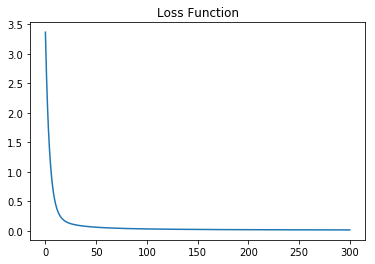

In [0]:
plt.title("Loss Function")
plt.plot(mse_history)
plt.show()

### (2) 정답값과 예측값의 비교

In [0]:
new_W = weight_history[-1]
y_pred = np.matmul(X,new_W)

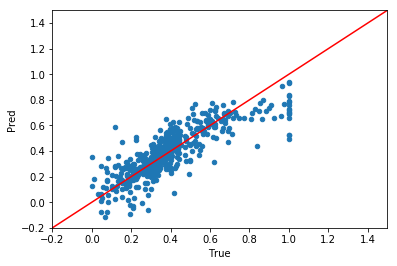

In [0]:
result_df = pd.DataFrame(np.concatenate([y,y_pred],axis=1),
                         columns=['True','Pred'])

result_df.plot('True','Pred',kind='scatter',
               xlim=[-0.2,1.5],ylim=[-0.2,1.5])
plt.plot([-0.2,1.5],[-0.2,1.5],color='r')
plt.show()

완벽하게 근사하진 못하지만, 어느정도 비슷하게 나오는 경향을 띄고있습니다.